In [5]:
from tensorflow.compat.v1.keras.applications.resnet50 import ResNet50
from tensorflow.compat.v1.keras.preprocessing import image
from tensorflow.compat.v1.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [18]:
from io import BytesIO
import urllib

def loadImage(URL):
    with urllib.request.urlopen(URL) as url:
        img = image.load_img(BytesIO(url.read()), target_size=(224, 224))

    return image.img_to_array(img)

img_path = 'https://a-static.mlcdn.com.br/618x463/violao-eletroacustico-flat-cutaway-aco-preto-sf-14-ceq-giannini/estrela10/119320/127e36123fdd664ddc678ee05ebd55d9.jpg'
x = loadImage(img_path)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02676566', 'acoustic_guitar', 0.9663585), ('n03272010', 'electric_guitar', 0.033010885), ('n03929660', 'pick', 0.00044201256)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


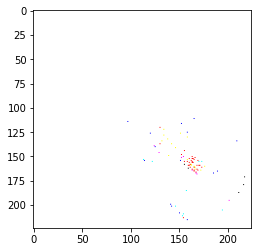

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(loadImage(img_path), cmap=plt.cm.binary)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation